## Imports

In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import simpledialog
print(matplotlib.matplotlib_fname())

from pogo_stick_jumping.jumping_ODE_Nonlinear import PogoODEnonlinear

C:\Users\andre\.matplotlib\matplotlibrc


## Save Figures Flag

In [2]:
SAVE_FIG = False

## Get Data Paths

In [33]:
ROOT = tk.Tk()
ROOT.withdraw()
title = "File Location"
prompt = "Enter the path to the evaluation data: "
# Get path from user
path = simpledialog.askstring(title, prompt)
# If user closes program
if path is None:
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# If user enters non-existant path
save_path = Path(path)
if not os.path.exists(save_path):
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# Set the paths according to how they should be saved
data_path = save_path / "plotting_data"
save_path = save_path / "figures"
# Make the save path if it does not exits
if not os.path.exists(save_path): os.makedirs(save_path)
# If the models path does not exist or is named wrong
if not os.path.exists(data_path):
    raise Exception("Plotting Data path does not exist or name of models file is not 'models'.")
    sys.exit()
# Print what the models path defined and the save path defined
print(f"\nThe data will be queued from:\n {data_path}\n")
print(f"The figures will be saved to:\n {save_path}")


The data will be queued from:
 training_data\2021_09_21\plotting_data

The figures will be saved to:
 training_data\2021_09_21\figures


## Import the Data from Path

In [34]:
# sort the files read in
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

files = sorted(glob.glob(str(data_path / '*.csv')), key=numericalSort)

print(f'Number of Agents found: {len(files)}\n')

# organize the data into dictionaries
# data = []                                                                                   # array to store agent data
file_names = []                                                                             # list to store file names for naming agents in dict
data = None
for f in files:
    file_name = os.path.basename(f)                                                         # get file name and split it up by
    file_name = re.split('[_ .]', file_name)
    # uncomment print statement to determine what numbers are needed in file_name
    print("Split file name: " , file_name, "\n")
    file_name = f"{file_name[1]}-{file_name[2]}"                                            # choose the parts of file name you want to keep using the previous print statment
    file_names.append(file_name)                                                            # add the agents name to the list of file names
    df = pandas.read_csv(f)                                                                 # read in the first .csv file
    df = df.transpose()
    print("Data from file shape: ", df.shape)
    # Change the header to be the first and second rows combined
    new_header = df.iloc[0] + '_' + df.iloc[1] + '_' + df.iloc[2]  #grab the first row for the header
    # Take the data below the header rows
    df = df[3:1003] 
    # Set the header row as the df header
    df.columns = new_header
    if data is None:
        data = df
        print("Initial shape: " , data.shape)
    else:
        data = pandas.concat([data, df], axis=1)
        print("Final shape: " , data.shape)
data

Number of Agents found: 2

Split file name:  ['all', 'result', 'max', 'csv'] 

Data from file shape:  (1004, 1800)
Initial shape:  (1000, 1800)
Split file name:  ['all', 'result', 'spec', 'csv'] 

Data from file shape:  (1004, 1800)
Final shape:  (1000, 3600)


,RewardHeight_1031_log_1_ep_max_height_value,RewardHeight_1031_log_1_ep_max_height_wall_time,RewardHeight_1031_log_1_ep_spring_k_value,RewardHeight_1031_log_1_ep_spring_k_wall_time,RewardHeight_1031_log_1_ep_zeta_value,RewardHeight_1031_log_1_ep_zeta_wall_time,RewardHeight_1031_log_1_rollout/ep_len_mean_value,RewardHeight_1031_log_1_rollout/ep_len_mean_wall_time,RewardHeight_1031_log_1_rollout/ep_rew_mean_value,RewardHeight_1031_log_1_rollout/ep_rew_mean_wall_time,...,RewardSpecifiedHeight_9993_log_1_rollout/ep_rew_mean_value,RewardSpecifiedHeight_9993_log_1_rollout/ep_rew_mean_wall_time,RewardSpecifiedHeight_9993_log_1_time/fps_value,RewardSpecifiedHeight_9993_log_1_time/fps_wall_time,RewardSpecifiedHeight_9993_log_1_train/critic_loss_value,RewardSpecifiedHeight_9993_log_1_train/critic_loss_wall_time,RewardSpecifiedHeight_9993_log_1_train/learning_rate_value,RewardSpecifiedHeight_9993_log_1_train/learning_rate_wall_time,RewardSpecifiedHeight_9993_log_1_train/actor_loss_value,RewardSpecifiedHeight_9993_log_1_train/actor_loss_wall_time
0,0.109298,1632201113.030693,3208.446289,1632201113.030753,0.007349,1632201113.030782,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.089244,1632201113.557926,2114.072998,1632201113.557984,0.003914,1632201113.558011,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.076308,1632201114.083723,1503.772949,1632201114.083788,0.009122,1632201114.083817,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.102998,1632201114.609609,5006.743164,1632201114.609668,0.016849,1632201114.609697,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.080651,1632201115.112983,1718.677124,1632201115.113045,0.010111,1632201115.113073,1.0,1632201114.610299,0.094462,1632201114.610345,...,0.931028,1632186491.184597,1.0,1632186491.184626,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.108666,1632201731.077909,3492.738525,1632201731.077976,0.019909,1632201731.078005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00008,1632187319.250593,0.001,1632187319.250616,NaN,NaN
996,0.108775,1632201731.727594,3474.142334,1632201731.727663,0.01991,1632201731.727692,1.0,1632201731.078634,0.108894,1632201731.078694,...,0.997429,1632187319.251502,1.0,1632187319.251531,0.000604,1632187320.028422,0.001,1632187320.028455,-0.993356,1632187320.028387
997,0.108775,1632201732.225033,3474.142334,1632201732.225091,0.01991,1632201732.225119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000032,1632187320.807352,0.001,1632187320.807385,NaN,NaN
998,0.108965,1632201732.83448,3441.912109,1632201732.834542,0.019913,1632201732.834571,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000191,1632187321.706437,0.001,1632187321.706459,-0.997941,1632187321.706415


## Remove unused Data:

In [35]:
training_cases = ["RewardHeight", "RewardSpecifiedHeight"]
data_values = ["ep_max_height_value", "ep_spring_k_value", "ep_zeta_value", "ep_rew_mean_value"]

# Drop unused data from dataframe
print("Dataframe shape before: ", data.shape)
drop_names = []
for column in data:
    if not any(data_values in column for data_values in data_values):
        print(column)
        drop_names.append(str(column))
data = data.drop(columns=drop_names)
print("Dataframe shape after: ", data.shape)

Dataframe shape before:  (1000, 3600)
RewardHeight_1031_log_1_ep_max_height_wall_time
RewardHeight_1031_log_1_ep_spring_k_wall_time
RewardHeight_1031_log_1_ep_zeta_wall_time
RewardHeight_1031_log_1_rollout/ep_len_mean_value
RewardHeight_1031_log_1_rollout/ep_len_mean_wall_time
RewardHeight_1031_log_1_rollout/ep_rew_mean_wall_time
RewardHeight_1031_log_1_time/fps_value
RewardHeight_1031_log_1_time/fps_wall_time
RewardHeight_1031_log_1_train/critic_loss_value
RewardHeight_1031_log_1_train/critic_loss_wall_time
RewardHeight_1031_log_1_train/learning_rate_value
RewardHeight_1031_log_1_train/learning_rate_wall_time
RewardHeight_1031_log_1_train/actor_loss_value
RewardHeight_1031_log_1_train/actor_loss_wall_time
RewardHeight_1042_log_1_ep_max_height_wall_time
RewardHeight_1042_log_1_ep_spring_k_wall_time
RewardHeight_1042_log_1_ep_zeta_wall_time
RewardHeight_1042_log_1_rollout/ep_len_mean_value
RewardHeight_1042_log_1_rollout/ep_len_mean_wall_time
RewardHeight_1042_log_1_rollout/ep_rew_mean_

## Get the mean and standard dev for the different cases and designs

In [36]:
height_height_df = data.filter(like=training_cases[0]).filter(like=data_values[0])
height_height_mean_df = height_height_df.mean(axis=1)
height_height_std_df = height_height_df.std(axis=1)

height_spring_k_df = data.filter(like=training_cases[0]).filter(like=data_values[1])
height_spring_k_mean_df = height_spring_k_df.mean(axis=1)
height_spring_k_std_df = height_spring_k_df.std(axis=1)

height_zeta_df = data.filter(like=training_cases[0]).filter(like=data_values[2])
height_zeta_mean_df = height_zeta_df.mean(axis=1)
height_zeta_std_df = height_zeta_df.std(axis=1)

height_reward_df = data.filter(like=training_cases[0]).filter(like=data_values[3])
height_reward_df = height_reward_df.dropna()
height_reward_mean_df = height_reward_df.mean(axis=1)
height_reward_std_df = height_reward_df.std(axis=1)

spechei_height_df = data.filter(like=training_cases[1]).filter(like=data_values[0])
spechei_height_mean_df = spechei_height_df.mean(axis=1)
spechei_height_std_df = spechei_height_df.std(axis=1)

spechei_spring_k_df = data.filter(like=training_cases[1]).filter(like=data_values[1])
spechei_spring_k_mean_df = spechei_spring_k_df.mean(axis=1)
spechei_spring_k_std_df = spechei_spring_k_df.std(axis=1)

spechei_zeta_df = data.filter(like=training_cases[1]).filter(like=data_values[2])
spechei_zeta_mean_df = spechei_zeta_df.mean(axis=1)
spechei_zeta_std_df = spechei_zeta_df.std(axis=1)

spechei_reward_df = data.filter(like=training_cases[1]).filter(like=data_values[3])
spechei_reward_df = spechei_reward_df.dropna()
spechei_reward_mean_df = spechei_reward_df.mean(axis=1)
spechei_reward_std_df = spechei_reward_df.std(axis=1)

reward_timesteps = np.arange(4, 1000, 4)
timesteps = np.arange(len(data))

## Reward vs Agent

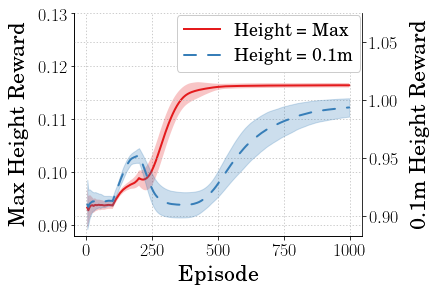

In [37]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax1.get_ymajorticklabels(),fontsize=18)
plt.setp(ax1.get_xmajorticklabels(),fontsize=18)

# Remove the top and right border, they are not needed
ax1.spines['right'].set_visible(True)
ax1.spines['right'].set_color("black")
# ax1.spines['top'].set_color('none')

# Define the positions of the axes tick marks
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Manually set the x-axis limits, if necessary
# plt.xlim(0,5)

# Turn on the plot grid and set appropriate linestyle and color
ax1.grid(True, linestyle=':', color='0.75')
ax1.set_axisbelow(True)

# Define the X and Y1 axis labels
ax1.set_xlabel('Episode', fontsize=22, weight='bold', labelpad=5)
ax1.set_ylabel(r'Max Height Reward', fontsize=22, weight='bold', labelpad=10)

# Plots gain used on input to tracking of Surge
ax1.plot(reward_timesteps, height_reward_mean_df, linewidth=2, linestyle='-', label="Height = Max")
ax1.fill_between(reward_timesteps, height_reward_mean_df-(height_reward_std_df/2), height_reward_mean_df+(height_reward_std_df)/2, alpha=0.25)
# ax1.plot(x, y1, linewidth=2, linestyle='-', label=r'$y_1$', )

# Manually set the y1-axes limits, if necessary
ax1.set_ylim(bottom=None, top=0.13)


# Set up the 2nd Y-axis, using the same x-axis as the first
ax2 = ax1.twinx()

# Remove the top border, it's not needed
# ax2.spines['top'].set_color('none')

# Turn on the plot grid and set appropriate linestyle and color
ax2.grid(True, linestyle=':', color='0.75')
ax2.set_axisbelow(True) 

# Change the y2 axis units font
plt.setp(ax2.get_ymajorticklabels(), fontsize=18)

# Define the Y2 axis labels
ax2.set_ylabel(r'0.1m Height Reward', fontsize=22, weight='bold', labelpad=10)

ax2.plot(reward_timesteps, spechei_reward_mean_df, linewidth=2, linestyle='--', color = '#377eb8', label="Height = 0.1m")
ax2.fill_between(reward_timesteps, spechei_reward_mean_df-(spechei_reward_std_df/2), spechei_reward_mean_df+(spechei_reward_std_df)/2, color = '#377eb8', alpha=0.25)
# ax2.plot(x, y2, linewidth=2, linestyle='--', color = '#377eb8', label=r'$y_2$')

# Manually set the y2-axes limits, if necessary
ax2.set_ylim(bottom=None, top=1.075)

# Create the legend, then fix the fontsize
# ask matplotlib for the plotted objects and their labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = 'RewVsTime.svg'
# path = save_path / filename
# plt.savefig(path, transparent=True)
# filename = 'RewVsTime.png'
# path = save_path / filename
# plt.savefig(path, transparent=True)
plt.show()

## Height Vs Agent  

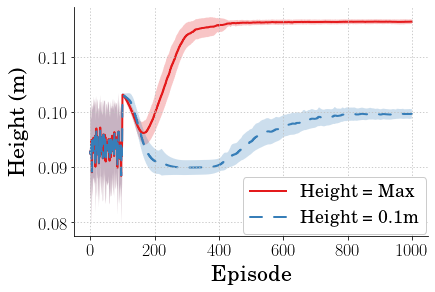

In [38]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Episode', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.plot(timesteps, height_height_mean_df, linewidth=2, linestyle='-', label="Height = Max")
plt.fill_between(timesteps, height_height_mean_df-(height_height_std_df/2), height_height_mean_df+(height_height_std_df)/2, alpha=0.25)
plt.plot(timesteps, spechei_height_mean_df, linewidth=2, linestyle='--', label="Height = 0.1m")
plt.fill_between(timesteps, spechei_height_mean_df-(spechei_height_std_df/2), spechei_height_mean_df+(spechei_height_std_df)/2, alpha=0.25)

# uncomment below and set limits if needed
# plt.xlim(0,4)
# plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='lower right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = 'HeightVsTime.svg'
# path = save_path / filename
# plt.savefig(path, transparent=True)
# filename = 'HeightVsTime.png'
# path = save_path / filename
# plt.savefig(path, transparent=True)
plt.show()

## Spring K

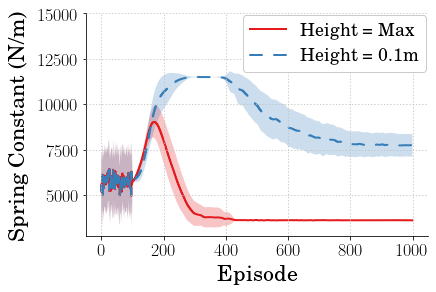

In [39]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Episode', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Spring Constant (N/m)', fontsize=22, weight='bold', labelpad=10)

plt.plot(timesteps, height_spring_k_mean_df, linewidth=2, linestyle='-', label="Height = Max")
plt.fill_between(timesteps, height_spring_k_mean_df-(height_spring_k_std_df/2), height_spring_k_mean_df+(height_spring_k_std_df)/2, alpha=0.25)
plt.plot(timesteps, spechei_spring_k_mean_df, linewidth=2, linestyle='--', label="Height = 0.1m")
plt.fill_between(timesteps, spechei_spring_k_mean_df-(spechei_spring_k_std_df/2), spechei_spring_k_mean_df+(spechei_spring_k_std_df)/2, alpha=0.25)

# uncomment below and set limits if needed
# plt.xlim(0,4)
plt.ylim(bottom=None, top=15000)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = 'SpringVsTime.svg'
# path = save_path / filename
# plt.savefig(path, transparent=True)
# filename = 'SpringVsTime.png'
# path = save_path / filename
# plt.savefig(path, transparent=True)

plt.show()

## Damping Ratio

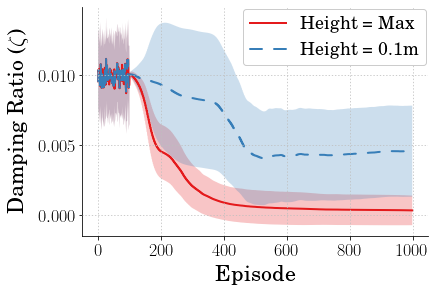

In [40]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Episode', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Damping Ratio ($\bf{\zeta}$)', fontsize=22, weight='bold', labelpad=10)

plt.plot(timesteps, height_zeta_mean_df, linewidth=2, linestyle='-', label="Height = Max")
plt.fill_between(timesteps, height_zeta_mean_df-(height_zeta_std_df/2), height_zeta_mean_df+(height_zeta_std_df)/2, alpha=0.25)
plt.plot(timesteps, spechei_zeta_mean_df, linewidth=2, linestyle='--', label="Height = 0.1m")
plt.fill_between(timesteps, spechei_zeta_mean_df-(spechei_zeta_std_df/2), spechei_zeta_mean_df+(spechei_zeta_std_df)/2, alpha=0.25)

# uncomment below and set limits if needed
# plt.xlim(0,4)
# plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# filename = 'ZetaVsTime.svg'
# path = save_path / filename
# plt.savefig(path, transparent=True)
# filename = 'ZetaVsTime.png'
# path = save_path / filename
# plt.savefig(path, transparent=True)
plt.show()

## Plot time series jumps of final designs

### Create Empty Lists of Values

In [25]:
spring_ks = []
spring_ks_std = []
zetas = []
zetas_std = []

### Append to the list the different values
- You may need to reload data from the top of this file
- Make sure not to override the lists with empty lists though

In [41]:
spring_ks.append(height_spring_k_mean_df.iloc[-1])
spring_ks.append(spechei_spring_k_mean_df.iloc[-1])
spring_ks_std.append(height_spring_k_std_df.iloc[-1])
spring_ks_std.append(spechei_spring_k_std_df.iloc[-1])

zetas.append(height_zeta_mean_df.iloc[-1])
zetas.append(spechei_zeta_mean_df.iloc[-1])
zetas_std.append(height_zeta_std_df.iloc[-1])
zetas_std.append(spechei_zeta_std_df.iloc[-1])

In [42]:
header = "spring_ks, spring_k_stds, zetas, zeta_stds"
data = np.array([spring_ks, spring_ks_std, zetas, zetas_std])
name = save_path / "final_designs.txt"
np.savetxt(name, data.transpose(), header=header, delimiter=',')

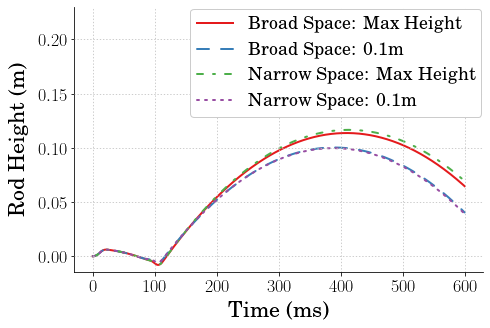

In [44]:
m_act = 1.003               # mass of the pogo-stick rod (kg)
m_rod = 0.175               # mass of the pogo-stick rod (kg)

spring_k = 5760

zeta = 0.075

f = 11.13         # natural freq. (rad)
A_max = 63.2      # max acceleration of actuator (m/s^2)
V_max = 2.0       # max velocity of actuator (m/s)
Distance = 0.008  # Distance to move actuator in jump command (m)
Spring_Limit = -0.008
Spacing = 0.75 * (1 / f)  # Space commands by 0.5*period of oscillation

x_init = 0.0
x_dot_init = 0.0
x_act_init = 0.0
x_act_dot_init = 0.0

heights = []
for ii in range(len(spring_ks)):
    pogo_stick = PogoODEnonlinear(m_act, m_rod, spring_ks[ii], zetas[ii], A_max, V_max, Distance, Spring_Limit, Spacing)
    x0 = [x_init, x_dot_init, x_act_init, x_act_dot_init]
    sim_time, timeseries = pogo_stick.run_simulation(x0, duration=1.0)
    heights.append(timeseries[0])

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6.75, 4.5))
# fig = plt.figure(figsize=(6, 4))

ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (ms)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Rod Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.plot(np.arange(len(heights[0][0:600])), heights[0][0:600], linewidth=2, linestyle='-', label="Broad Space: Max Height")
plt.plot(np.arange(len(heights[1][0:600])), heights[1][0:600], linewidth=2, linestyle='--', label="Broad Space: 0.1m")
plt.plot(np.arange(len(heights[2][0:600])), heights[2][0:600], linewidth=2, linestyle='-.', label="Narrow Space: Max Height")
plt.plot(np.arange(len(heights[3][0:600])), heights[3][0:600], linewidth=2, linestyle=':', label="Narrow Space: 0.1m")

# uncomment below and set limits if needed
# plt.xlim(0,4)
plt.ylim(bottom=None, top=0.23)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'TimeseriesHeight.svg'
path = save_path / filename
plt.savefig(path, transparent=True)
filename = 'TimeseriesHeight.png'
path = save_path / filename
plt.savefig(path, transparent=True)
plt.show()